## Assignment 5.1
### Implement the movie review classifier found in section 3.4 of Deep Learning with Python.

In [102]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [103]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [104]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [105]:
train_labels[0]

1

In [106]:
max([max(sequence) for sequence in train_data])

9999

In [107]:
word = imdb.get_word_index()
reverse_word = dict([(value, key) for (key, value) in word.items()])
decoded_review = ' '.join([reverse_word.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [108]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [109]:
train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [110]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [111]:
#The Keras implementation
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [112]:
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [113]:
#from keras import optimizers
#model.compile(optimizer=optimizers.rmsprop(lr=0.001),
from tensorflow import keras
from keras import optimizers
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])
#model.compile(optimizer=optimizers.rmsprop(lr=0.001),
#loss=losses.binary_crossentropy,
#metrics=[metrics.binary_accuracy])

In [114]:
from keras import losses
from keras import metrics
model.compile(optimizer='rmsprop',
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

In [115]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [116]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 50ms/step - loss: 0.4866 - binary_accuracy: 0.7926 - val_loss: 0.3635 - val_binary_accuracy: 0.8683
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2872 - binary_accuracy: 0.9029 - val_loss: 0.2939 - val_binary_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2160 - binary_accuracy: 0.9266 - val_loss: 0.2818 - val_binary_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1663 - binary_accuracy: 0.9455 - val_loss: 0.2927 - val_binary_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1382 - binary_accuracy: 0.9546 - val_loss: 0.2831 - val_binary_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1121 - binary_accuracy: 0.9657 - val_loss: 0.3509 - val_binary_accuracy: 0.8689
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - los

In [117]:
history_dict = history.history
history_dict.keys()
#print(history_dict)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

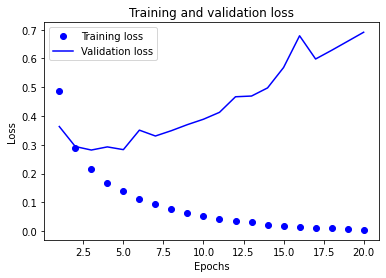

In [118]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

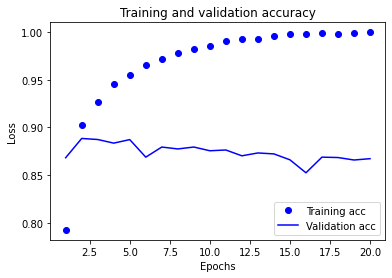

In [119]:
plt.clf() 
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [120]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.4502 - accuracy: 0.8280
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2640 - accuracy: 0.9080
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2022 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3005 - accuracy: 0.8815


In [121]:
results

[0.3005211055278778, 0.8814799785614014]

In [122]:
model.predict(x_test)

array([[0.22571936],
       [0.9993597 ],
       [0.9452469 ],
       ...,
       [0.22222835],
       [0.09800401],
       [0.72671765]], dtype=float32)

## Assignment 5.2
### Implement the news classifier found in section 3.5 of Deep Learning with Python.

In [123]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [124]:
len(train_data)

8982

In [125]:
len(test_data)

2246

In [126]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [127]:
#Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [128]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [129]:
train_labels[10]

3

In [130]:
# Encoding the data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# Model definition
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compiling the model
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [131]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [132]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 62ms/step - loss: 2.7183 - accuracy: 0.4738 - val_loss: 1.8605 - val_accuracy: 0.6250
Epoch 2/20
16/16 [==============================] - 1s 39ms/step - loss: 1.4807 - accuracy: 0.7042 - val_loss: 1.3356 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.0681 - accuracy: 0.7793 - val_loss: 1.1447 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 1s 38ms/step - loss: 0.8342 - accuracy: 0.8300 - val_loss: 1.0361 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 0.6590 - accuracy: 0.8627 - val_loss: 0.9611 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.5276 - accuracy: 0.8926 - val_loss: 0.9208 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 39ms/step - loss: 0.4221 - accuracy: 0.9153 - val_loss: 0.8862 - val_accuracy: 0.8140
Epoch 8/20
16

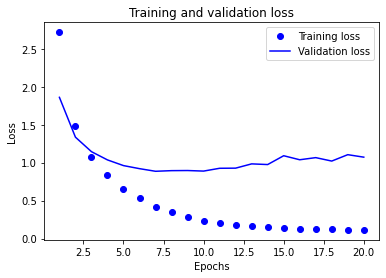

In [133]:
#  Plotting the training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

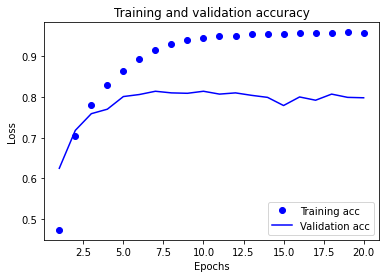

In [134]:
# Plotting the training and validation accuracy
plt.clf() # clears the figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [135]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
              partial_y_train,
              epochs=8,
              batch_size=512,
              validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 2s 55ms/step - loss: 2.6030 - accuracy: 0.5040 - val_loss: 1.7465 - val_accuracy: 0.6310
Epoch 2/8
16/16 [==============================] - 1s 39ms/step - loss: 1.4245 - accuracy: 0.6979 - val_loss: 1.3035 - val_accuracy: 0.7070
Epoch 3/8
16/16 [==============================] - 1s 36ms/step - loss: 1.0473 - accuracy: 0.7769 - val_loss: 1.1278 - val_accuracy: 0.7690
Epoch 4/8
16/16 [==============================] - 1s 41ms/step - loss: 0.8233 - accuracy: 0.8272 - val_loss: 1.0306 - val_accuracy: 0.7790
Epoch 5/8
16/16 [==============================] - 1s 36ms/step - loss: 0.6536 - accuracy: 0.8641 - val_loss: 0.9466 - val_accuracy: 0.7960
Epoch 6/8
16/16 [==============================] - 1s 38ms/step - loss: 0.5219 - accuracy: 0.8916 - val_loss: 0.9076 - val_accuracy: 0.8070
Epoch 7/8
16/16 [==============================] - 1s 38ms/step - loss: 0.4127 - accuracy: 0.9126 - val_loss: 0.8858 - val_accuracy: 0.8160
Epoch 8/8
71/71 [===

In [136]:
results

[0.9639521837234497, 0.7889581322669983]

In [137]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.17809439002671415

This approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case it’s closer to 19%, so the results seem pretty good, at least when compared to
a random baseline:

In [138]:
# Generating predictions for new data
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [139]:
np.sum(predictions[0])

0.99999994

In [140]:
np.argmax(predictions[0])

3

In [141]:
predictions

array([[1.2251889e-04, 9.2463114e-04, 6.6101143e-06, ..., 9.2511757e-05,
        2.5338721e-05, 3.0632980e-06],
       [3.0446860e-03, 4.7666993e-02, 6.4534768e-03, ..., 5.3008384e-04,
        1.6110166e-06, 1.0644916e-03],
       [1.1694295e-03, 7.0242232e-01, 3.9843633e-03, ..., 3.4868093e-03,
        2.8344491e-04, 5.6148916e-03],
       ...,
       [9.4774332e-05, 4.9635494e-04, 9.3237159e-06, ..., 4.8433420e-05,
        1.1326128e-04, 1.2470528e-05],
       [3.3771638e-03, 4.6366971e-02, 1.9363959e-03, ..., 1.4343325e-03,
        8.4585557e-04, 9.9322188e-04],
       [1.2607496e-04, 3.6509940e-01, 1.1722916e-02, ..., 7.2066893e-04,
        1.1865647e-04, 1.5609650e-03]], dtype=float32)

In [142]:
# A different way to handle the labels and the loss
y_train = np.array(train_labels)
y_test = np.array(test_labels)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

# A model with an information bottleneck
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 2.7393 - accuracy: 0.4660 - val_loss: 2.0160 - val_accuracy: 0.5780
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 1.7242 - accuracy: 0.5891 - val_loss: 1.5684 - val_accuracy: 0.6230
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.4182 - accuracy: 0.6255 - val_loss: 1.4598 - val_accuracy: 0.6190
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 1.2801 - accuracy: 0.6379 - val_loss: 1.4274 - val_accuracy: 0.6280
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 1.1831 - accuracy: 0.6636 - val_loss: 1.4271 - val_accuracy: 0.6300
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 1.1041 - accuracy: 0.6887 - val_loss: 1.4042 - val_accuracy: 0.6580
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0355 - accuracy: 0.7224 - val_loss: 1.4359 - val_accuracy: 0.6680
Epoch 8/20
63

The network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop
is mostly due to the fact that you’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The network is able to cram most of the necessary
information into these eight-dimensional representations, but not all of it

## Assignment 5.3
### Implement the housing price regression model found in section 3.6 of Deep Learning with Python.

In [143]:
import keras
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [144]:
train_data.shape

(404, 13)

In [145]:
test_data.shape

(102, 13)

In [146]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [147]:
#  Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# Model definition
from keras import models
from keras import layers
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [148]:
#  K-fold validation
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [149]:
all_scores

[2.0095455646514893, 2.5141475200653076, 2.511430263519287, 2.6009721755981445]

In [150]:
np.mean(all_scores)

2.409023880958557

The different runs do indeed show rather different validation scores, from 2.1 to 2.6.
The average (2.4) is a much more reliable metric than any single score—that’s the
entire point of K-fold cross-validation. In this case, you’re off by $2,400 on average,
which is significant considering that the prices range from $10,000 to $50,000.

In [151]:
# Saving the validation logs at each fold
from keras import backend as K
K.clear_session()
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


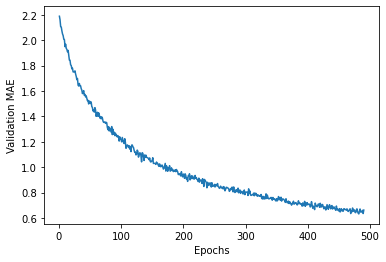

In [152]:
# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

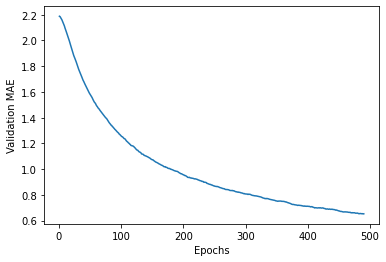

In [153]:
# Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [154]:
# Training the final model
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 13.2494 - mae: 2.3650


In [155]:
test_mae_score

2.3650262355804443

In [156]:
predictions = model.predict(test_data)
predictions[0]

array([8.13542], dtype=float32)